In [11]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 24.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [14]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [17]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [20]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [21]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [22]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [24]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:34:55 +0000 2021'
'Thu Nov 04 19:34:54 +0000 2021'
'Thu Nov 04 19:34:53 +0000 2021'
'Thu Nov 04 19:34:53 +0000 2021'
'Thu Nov 04 19:34:51 +0000 2021'
'Thu Nov 04 19:34:51 +0000 2021'
'Thu Nov 04 19:34:50 +0000 2021'
'Thu Nov 04 19:34:50 +0000 2021'
'Thu Nov 04 19:34:49 +0000 2021'
'Thu Nov 04 19:34:49 +0000 2021'
'Thu Nov 04 19:34:49 +0000 2021'
'Thu Nov 04 19:34:48 +0000 2021'
'Thu Nov 04 19:34:48 +0000 2021'
'Thu Nov 04 19:34:47 +0000 2021'
'Thu Nov 04 19:34:46 +0000 2021'
'Thu Nov 04 19:34:46 +0000 2021'
'Thu Nov 04 19:34:46 +0000 2021'
'Thu Nov 04 19:34:45 +0000 2021'
'Thu Nov 04 19:34:45 +0000 2021'
'Thu Nov 04 19:34:45 +0000 2021'
'Thu Nov 04 19:34:42 +0000 2021'
'Thu Nov 04 19:34:42 +0000 2021'
'Thu Nov 04 19:34:39 +0000 2021'
'Thu Nov 04 19:34:38 +0000 2021'
'Thu Nov 04 19:34:37 +0000 2021'
'Thu Nov 04 19:34:37 +0000 2021'
'Thu Nov 04 19:34:36 +0000 2021'
'Thu Nov 04 19:34:36 +0000 2021'
'Thu Nov 04 19:34:36 +0000 2021'
'Thu Nov 04 19:34:36 +0000 2021'
'Thu Nov 0

In [26]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 19:33:58 +0000 2021'
'Thu Nov 04 19:33:56 +0000 2021'
'Thu Nov 04 19:33:56 +0000 2021'
'Thu Nov 04 19:33:55 +0000 2021'
'Thu Nov 04 19:33:55 +0000 2021'
'Thu Nov 04 19:33:55 +0000 2021'
'Thu Nov 04 19:33:54 +0000 2021'
'Thu Nov 04 19:33:54 +0000 2021'
'Thu Nov 04 19:33:53 +0000 2021'
'Thu Nov 04 19:33:53 +0000 2021'
'Thu Nov 04 19:33:51 +0000 2021'
'Thu Nov 04 19:33:51 +0000 2021'
'Thu Nov 04 19:33:51 +0000 2021'
'Thu Nov 04 19:33:50 +0000 2021'
'Thu Nov 04 19:33:49 +0000 2021'
'Thu Nov 04 19:33:48 +0000 2021'
'Thu Nov 04 19:33:48 +0000 2021'
'Thu Nov 04 19:33:48 +0000 2021'
'Thu Nov 04 19:33:47 +0000 2021'
'Thu Nov 04 19:33:47 +0000 2021'
'Thu Nov 04 19:33:46 +0000 2021'
'Thu Nov 04 19:33:45 +0000 2021'
'Thu Nov 04 19:33:45 +0000 2021'
'Thu Nov 04 19:33:44 +0000 2021'
'Thu Nov 04 19:33:44 +0000 2021'
'Thu Nov 04 19:33:43 +0000 2021'
'Thu Nov 04 19:33:43 +0000 2021'
'Thu Nov 04 19:33:43 +0000 2021'
'Thu Nov 04 19:33:41 +0000 2021'
'Thu Nov 04 19:33:41 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:31:27 +0000 2021'
'Thu Nov 04 19:31:26 +0000 2021'
'Thu Nov 04 19:31:26 +0000 2021'
'Thu Nov 04 19:31:25 +0000 2021'
'Thu Nov 04 19:31:24 +0000 2021'
'Thu Nov 04 19:31:24 +0000 2021'
'Thu Nov 04 19:31:23 +0000 2021'
'Thu Nov 04 19:31:23 +0000 2021'
'Thu Nov 04 19:31:22 +0000 2021'
'Thu Nov 04 19:31:22 +0000 2021'
'Thu Nov 04 19:31:22 +0000 2021'
'Thu Nov 04 19:31:21 +0000 2021'
'Thu Nov 04 19:31:21 +0000 2021'
'Thu Nov 04 19:31:20 +0000 2021'
'Thu Nov 04 19:31:19 +0000 2021'
'Thu Nov 04 19:31:19 +0000 2021'
'Thu Nov 04 19:31:18 +0000 2021'
'Thu Nov 04 19:31:18 +0000 2021'
'Thu Nov 04 19:31:18 +0000 2021'
'Thu Nov 04 19:31:16 +0000 2021'
'Thu Nov 04 19:31:15 +0000 2021'
'Thu Nov 04 19:31:15 +0000 2021'
'Thu Nov 04 19:31:15 +0000 2021'
'Thu Nov 04 19:31:14 +0000 2021'
'Thu Nov 04 19:31:14 +0000 2021'
'Thu Nov 04 19:31:14 +0000 2021'
'Thu Nov 04 19:31:14 +0000 2021'
'Thu Nov 04 19:31:13 +0000 2021'
'Thu Nov 04 19:31:12 +0000 2021'
'Thu Nov 04 19:31:12 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:29:13 +0000 2021'
'Thu Nov 04 19:29:13 +0000 2021'
'Thu Nov 04 19:29:13 +0000 2021'
'Thu Nov 04 19:29:13 +0000 2021'
'Thu Nov 04 19:29:13 +0000 2021'
'Thu Nov 04 19:29:12 +0000 2021'
'Thu Nov 04 19:29:12 +0000 2021'
'Thu Nov 04 19:29:10 +0000 2021'
'Thu Nov 04 19:29:10 +0000 2021'
'Thu Nov 04 19:29:09 +0000 2021'
'Thu Nov 04 19:29:09 +0000 2021'
'Thu Nov 04 19:29:09 +0000 2021'
'Thu Nov 04 19:29:07 +0000 2021'
'Thu Nov 04 19:29:07 +0000 2021'
'Thu Nov 04 19:29:06 +0000 2021'
'Thu Nov 04 19:29:06 +0000 2021'
'Thu Nov 04 19:29:05 +0000 2021'
'Thu Nov 04 19:29:05 +0000 2021'
'Thu Nov 04 19:29:04 +0000 2021'
'Thu Nov 04 19:29:03 +0000 2021'
'Thu Nov 04 19:29:03 +0000 2021'
'Thu Nov 04 19:29:03 +0000 2021'
'Thu Nov 04 19:29:03 +0000 2021'
'Thu Nov 04 19:29:02 +0000 2021'
'Thu Nov 04 19:29:01 +0000 2021'
'Thu Nov 04 19:29:01 +0000 2021'
'Thu Nov 04 19:29:01 +0000 2021'
'Thu Nov 04 19:29:00 +0000 2021'
'Thu Nov 04 19:28:59 +0000 2021'
'Thu Nov 04 19:28:59 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:26:59 +0000 2021'
'Thu Nov 04 19:26:58 +0000 2021'
'Thu Nov 04 19:26:58 +0000 2021'
'Thu Nov 04 19:26:58 +0000 2021'
'Thu Nov 04 19:26:57 +0000 2021'
'Thu Nov 04 19:26:57 +0000 2021'
'Thu Nov 04 19:26:56 +0000 2021'
'Thu Nov 04 19:26:56 +0000 2021'
'Thu Nov 04 19:26:55 +0000 2021'
'Thu Nov 04 19:26:54 +0000 2021'
'Thu Nov 04 19:26:54 +0000 2021'
'Thu Nov 04 19:26:53 +0000 2021'
'Thu Nov 04 19:26:52 +0000 2021'
'Thu Nov 04 19:26:52 +0000 2021'
'Thu Nov 04 19:26:52 +0000 2021'
'Thu Nov 04 19:26:52 +0000 2021'
'Thu Nov 04 19:26:51 +0000 2021'
'Thu Nov 04 19:26:51 +0000 2021'
'Thu Nov 04 19:26:51 +0000 2021'
'Thu Nov 04 19:26:50 +0000 2021'
'Thu Nov 04 19:26:50 +0000 2021'
'Thu Nov 04 19:26:46 +0000 2021'
'Thu Nov 04 19:26:46 +0000 2021'
'Thu Nov 04 19:26:44 +0000 2021'
'Thu Nov 04 19:26:44 +0000 2021'
'Thu Nov 04 19:26:41 +0000 2021'
'Thu Nov 04 19:26:40 +0000 2021'
'Thu Nov 04 19:26:40 +0000 2021'
'Thu Nov 04 19:26:38 +0000 2021'
'Thu Nov 04 19:26:38 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:24:34 +0000 2021'
'Thu Nov 04 19:24:33 +0000 2021'
'Thu Nov 04 19:24:33 +0000 2021'
'Thu Nov 04 19:24:32 +0000 2021'
'Thu Nov 04 19:24:32 +0000 2021'
'Thu Nov 04 19:24:31 +0000 2021'
'Thu Nov 04 19:24:31 +0000 2021'
'Thu Nov 04 19:24:30 +0000 2021'
'Thu Nov 04 19:24:30 +0000 2021'
'Thu Nov 04 19:24:30 +0000 2021'
'Thu Nov 04 19:24:30 +0000 2021'
'Thu Nov 04 19:24:29 +0000 2021'
'Thu Nov 04 19:24:29 +0000 2021'
'Thu Nov 04 19:24:28 +0000 2021'
'Thu Nov 04 19:24:28 +0000 2021'
'Thu Nov 04 19:24:28 +0000 2021'
'Thu Nov 04 19:24:28 +0000 2021'
'Thu Nov 04 19:24:26 +0000 2021'
'Thu Nov 04 19:24:26 +0000 2021'
'Thu Nov 04 19:24:26 +0000 2021'
'Thu Nov 04 19:24:25 +0000 2021'
'Thu Nov 04 19:24:25 +0000 2021'
'Thu Nov 04 19:24:24 +0000 2021'
'Thu Nov 04 19:24:23 +0000 2021'
'Thu Nov 04 19:24:22 +0000 2021'
'Thu Nov 04 19:24:22 +0000 2021'
'Thu Nov 04 19:24:22 +0000 2021'
'Thu Nov 04 19:24:22 +0000 2021'
'Thu Nov 04 19:24:21 +0000 2021'
'Thu Nov 04 19:24:20 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:22:22 +0000 2021'
'Thu Nov 04 19:22:21 +0000 2021'
'Thu Nov 04 19:22:21 +0000 2021'
'Thu Nov 04 19:22:20 +0000 2021'
'Thu Nov 04 19:22:20 +0000 2021'
'Thu Nov 04 19:22:20 +0000 2021'
'Thu Nov 04 19:22:20 +0000 2021'
'Thu Nov 04 19:22:19 +0000 2021'
'Thu Nov 04 19:22:19 +0000 2021'
'Thu Nov 04 19:22:18 +0000 2021'
'Thu Nov 04 19:22:18 +0000 2021'
'Thu Nov 04 19:22:16 +0000 2021'
'Thu Nov 04 19:22:16 +0000 2021'
'Thu Nov 04 19:22:16 +0000 2021'
'Thu Nov 04 19:22:15 +0000 2021'
'Thu Nov 04 19:22:13 +0000 2021'
'Thu Nov 04 19:22:13 +0000 2021'
'Thu Nov 04 19:22:12 +0000 2021'
'Thu Nov 04 19:22:11 +0000 2021'
'Thu Nov 04 19:22:10 +0000 2021'
'Thu Nov 04 19:22:10 +0000 2021'
'Thu Nov 04 19:22:10 +0000 2021'
'Thu Nov 04 19:22:09 +0000 2021'
'Thu Nov 04 19:22:09 +0000 2021'
'Thu Nov 04 19:22:09 +0000 2021'
'Thu Nov 04 19:22:09 +0000 2021'
'Thu Nov 04 19:22:08 +0000 2021'
'Thu Nov 04 19:22:08 +0000 2021'
'Thu Nov 04 19:22:07 +0000 2021'
'Thu Nov 04 19:22:07 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:20:03 +0000 2021'
'Thu Nov 04 19:20:03 +0000 2021'
'Thu Nov 04 19:20:03 +0000 2021'
'Thu Nov 04 19:20:03 +0000 2021'
'Thu Nov 04 19:20:03 +0000 2021'
'Thu Nov 04 19:20:03 +0000 2021'
'Thu Nov 04 19:20:02 +0000 2021'
'Thu Nov 04 19:20:02 +0000 2021'
'Thu Nov 04 19:20:02 +0000 2021'
'Thu Nov 04 19:20:02 +0000 2021'
'Thu Nov 04 19:20:02 +0000 2021'
'Thu Nov 04 19:20:02 +0000 2021'
'Thu Nov 04 19:20:01 +0000 2021'
'Thu Nov 04 19:20:01 +0000 2021'
'Thu Nov 04 19:20:00 +0000 2021'
'Thu Nov 04 19:20:00 +0000 2021'
'Thu Nov 04 19:19:59 +0000 2021'
'Thu Nov 04 19:19:59 +0000 2021'
'Thu Nov 04 19:19:59 +0000 2021'
'Thu Nov 04 19:19:59 +0000 2021'
'Thu Nov 04 19:19:58 +0000 2021'
'Thu Nov 04 19:19:56 +0000 2021'
'Thu Nov 04 19:19:56 +0000 2021'
'Thu Nov 04 19:19:56 +0000 2021'
'Thu Nov 04 19:19:55 +0000 2021'
'Thu Nov 04 19:19:54 +0000 2021'
'Thu Nov 04 19:19:54 +0000 2021'
'Thu Nov 04 19:19:51 +0000 2021'
'Thu Nov 04 19:19:50 +0000 2021'
'Thu Nov 04 19:19:49 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:17:43 +0000 2021'
'Thu Nov 04 19:17:43 +0000 2021'
'Thu Nov 04 19:17:43 +0000 2021'
'Thu Nov 04 19:17:41 +0000 2021'
'Thu Nov 04 19:17:41 +0000 2021'
'Thu Nov 04 19:17:41 +0000 2021'
'Thu Nov 04 19:17:39 +0000 2021'
'Thu Nov 04 19:17:39 +0000 2021'
'Thu Nov 04 19:17:38 +0000 2021'
'Thu Nov 04 19:17:37 +0000 2021'
'Thu Nov 04 19:17:37 +0000 2021'
'Thu Nov 04 19:17:36 +0000 2021'
'Thu Nov 04 19:17:35 +0000 2021'
'Thu Nov 04 19:17:34 +0000 2021'
'Thu Nov 04 19:17:34 +0000 2021'
'Thu Nov 04 19:17:34 +0000 2021'
'Thu Nov 04 19:17:33 +0000 2021'
'Thu Nov 04 19:17:33 +0000 2021'
'Thu Nov 04 19:17:32 +0000 2021'
'Thu Nov 04 19:17:31 +0000 2021'
'Thu Nov 04 19:17:30 +0000 2021'
'Thu Nov 04 19:17:30 +0000 2021'
'Thu Nov 04 19:17:29 +0000 2021'
'Thu Nov 04 19:17:27 +0000 2021'
'Thu Nov 04 19:17:27 +0000 2021'
'Thu Nov 04 19:17:26 +0000 2021'
'Thu Nov 04 19:17:26 +0000 2021'
'Thu Nov 04 19:17:26 +0000 2021'
'Thu Nov 04 19:17:25 +0000 2021'
'Thu Nov 04 19:17:25 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:15:26 +0000 2021'
'Thu Nov 04 19:15:26 +0000 2021'
'Thu Nov 04 19:15:25 +0000 2021'
'Thu Nov 04 19:15:25 +0000 2021'
'Thu Nov 04 19:15:24 +0000 2021'
'Thu Nov 04 19:15:24 +0000 2021'
'Thu Nov 04 19:15:24 +0000 2021'
'Thu Nov 04 19:15:24 +0000 2021'
'Thu Nov 04 19:15:23 +0000 2021'
'Thu Nov 04 19:15:22 +0000 2021'
'Thu Nov 04 19:15:22 +0000 2021'
'Thu Nov 04 19:15:22 +0000 2021'
'Thu Nov 04 19:15:22 +0000 2021'
'Thu Nov 04 19:15:21 +0000 2021'
'Thu Nov 04 19:15:21 +0000 2021'
'Thu Nov 04 19:15:21 +0000 2021'
'Thu Nov 04 19:15:18 +0000 2021'
'Thu Nov 04 19:15:18 +0000 2021'
'Thu Nov 04 19:15:16 +0000 2021'
'Thu Nov 04 19:15:15 +0000 2021'
'Thu Nov 04 19:15:14 +0000 2021'
'Thu Nov 04 19:15:14 +0000 2021'
'Thu Nov 04 19:15:13 +0000 2021'
'Thu Nov 04 19:15:13 +0000 2021'
'Thu Nov 04 19:15:13 +0000 2021'
'Thu Nov 04 19:15:12 +0000 2021'
'Thu Nov 04 19:15:11 +0000 2021'
'Thu Nov 04 19:15:11 +0000 2021'
'Thu Nov 04 19:15:10 +0000 2021'
'Thu Nov 04 19:15:10 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:13:44 +0000 2021'
'Thu Nov 04 19:13:43 +0000 2021'
'Thu Nov 04 19:13:43 +0000 2021'
'Thu Nov 04 19:13:43 +0000 2021'
'Thu Nov 04 19:13:42 +0000 2021'
'Thu Nov 04 19:13:42 +0000 2021'
'Thu Nov 04 19:13:42 +0000 2021'
'Thu Nov 04 19:13:41 +0000 2021'
'Thu Nov 04 19:13:40 +0000 2021'
'Thu Nov 04 19:13:40 +0000 2021'
'Thu Nov 04 19:13:40 +0000 2021'
'Thu Nov 04 19:13:40 +0000 2021'
'Thu Nov 04 19:13:40 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:39 +0000 2021'
'Thu Nov 04 19:13:38 +0000 2021'
'Thu Nov 04 19:13:38 +0000 2021'
'Thu Nov 04 19:13:37 +0000 2021'
'Thu Nov 04 19:13:36 +0000 2021'
'Thu Nov 04 19:13:35 +0000 2021'
'Thu Nov 04 19:13:35 +0000 2021'
'Thu Nov 04 19:13:35 +0000 2021'
'Thu Nov 04 19:13:34 +0000 2021'
'Thu Nov 04 19:13:33 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:11:37 +0000 2021'
'Thu Nov 04 19:11:36 +0000 2021'
'Thu Nov 04 19:11:35 +0000 2021'
'Thu Nov 04 19:11:35 +0000 2021'
'Thu Nov 04 19:11:35 +0000 2021'
'Thu Nov 04 19:11:35 +0000 2021'
'Thu Nov 04 19:11:34 +0000 2021'
'Thu Nov 04 19:11:33 +0000 2021'
'Thu Nov 04 19:11:33 +0000 2021'
'Thu Nov 04 19:11:33 +0000 2021'
'Thu Nov 04 19:11:32 +0000 2021'
'Thu Nov 04 19:11:31 +0000 2021'
'Thu Nov 04 19:11:30 +0000 2021'
'Thu Nov 04 19:11:30 +0000 2021'
'Thu Nov 04 19:11:29 +0000 2021'
'Thu Nov 04 19:11:28 +0000 2021'
'Thu Nov 04 19:11:28 +0000 2021'
'Thu Nov 04 19:11:26 +0000 2021'
'Thu Nov 04 19:11:26 +0000 2021'
'Thu Nov 04 19:11:25 +0000 2021'
'Thu Nov 04 19:11:25 +0000 2021'
'Thu Nov 04 19:11:25 +0000 2021'
'Thu Nov 04 19:11:23 +0000 2021'
'Thu Nov 04 19:11:22 +0000 2021'
'Thu Nov 04 19:11:21 +0000 2021'
'Thu Nov 04 19:11:21 +0000 2021'
'Thu Nov 04 19:11:21 +0000 2021'
'Thu Nov 04 19:11:20 +0000 2021'
'Thu Nov 04 19:11:20 +0000 2021'
'Thu Nov 04 19:11:19 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:09:36 +0000 2021'
'Thu Nov 04 19:09:34 +0000 2021'
'Thu Nov 04 19:09:33 +0000 2021'
'Thu Nov 04 19:09:32 +0000 2021'
'Thu Nov 04 19:09:32 +0000 2021'
'Thu Nov 04 19:09:30 +0000 2021'
'Thu Nov 04 19:09:30 +0000 2021'
'Thu Nov 04 19:09:30 +0000 2021'
'Thu Nov 04 19:09:29 +0000 2021'
'Thu Nov 04 19:09:29 +0000 2021'
'Thu Nov 04 19:09:29 +0000 2021'
'Thu Nov 04 19:09:29 +0000 2021'
'Thu Nov 04 19:09:28 +0000 2021'
'Thu Nov 04 19:09:27 +0000 2021'
'Thu Nov 04 19:09:27 +0000 2021'
'Thu Nov 04 19:09:27 +0000 2021'
'Thu Nov 04 19:09:25 +0000 2021'
'Thu Nov 04 19:09:25 +0000 2021'
'Thu Nov 04 19:09:24 +0000 2021'
'Thu Nov 04 19:09:24 +0000 2021'
'Thu Nov 04 19:09:24 +0000 2021'
'Thu Nov 04 19:09:23 +0000 2021'
'Thu Nov 04 19:09:22 +0000 2021'
'Thu Nov 04 19:09:22 +0000 2021'
'Thu Nov 04 19:09:22 +0000 2021'
'Thu Nov 04 19:09:22 +0000 2021'
'Thu Nov 04 19:09:21 +0000 2021'
'Thu Nov 04 19:09:20 +0000 2021'
'Thu Nov 04 19:09:20 +0000 2021'
'Thu Nov 04 19:09:19 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:07:17 +0000 2021'
'Thu Nov 04 19:07:16 +0000 2021'
'Thu Nov 04 19:07:15 +0000 2021'
'Thu Nov 04 19:07:15 +0000 2021'
'Thu Nov 04 19:07:14 +0000 2021'
'Thu Nov 04 19:07:14 +0000 2021'
'Thu Nov 04 19:07:13 +0000 2021'
'Thu Nov 04 19:07:13 +0000 2021'
'Thu Nov 04 19:07:13 +0000 2021'
'Thu Nov 04 19:07:13 +0000 2021'
'Thu Nov 04 19:07:13 +0000 2021'
'Thu Nov 04 19:07:12 +0000 2021'
'Thu Nov 04 19:07:11 +0000 2021'
'Thu Nov 04 19:07:11 +0000 2021'
'Thu Nov 04 19:07:10 +0000 2021'
'Thu Nov 04 19:07:10 +0000 2021'
'Thu Nov 04 19:07:10 +0000 2021'
'Thu Nov 04 19:07:08 +0000 2021'
'Thu Nov 04 19:07:07 +0000 2021'
'Thu Nov 04 19:07:06 +0000 2021'
'Thu Nov 04 19:07:06 +0000 2021'
'Thu Nov 04 19:07:06 +0000 2021'
'Thu Nov 04 19:07:06 +0000 2021'
'Thu Nov 04 19:07:05 +0000 2021'
'Thu Nov 04 19:07:05 +0000 2021'
'Thu Nov 04 19:07:05 +0000 2021'
'Thu Nov 04 19:07:04 +0000 2021'
'Thu Nov 04 19:07:04 +0000 2021'
'Thu Nov 04 19:07:04 +0000 2021'
'Thu Nov 04 19:07:03 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:05:15 +0000 2021'
'Thu Nov 04 19:05:14 +0000 2021'
'Thu Nov 04 19:05:14 +0000 2021'
'Thu Nov 04 19:05:14 +0000 2021'
'Thu Nov 04 19:05:14 +0000 2021'
'Thu Nov 04 19:05:12 +0000 2021'
'Thu Nov 04 19:05:12 +0000 2021'
'Thu Nov 04 19:05:11 +0000 2021'
'Thu Nov 04 19:05:11 +0000 2021'
'Thu Nov 04 19:05:10 +0000 2021'
'Thu Nov 04 19:05:09 +0000 2021'
'Thu Nov 04 19:05:09 +0000 2021'
'Thu Nov 04 19:05:09 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:07 +0000 2021'
'Thu Nov 04 19:05:06 +0000 2021'
'Thu Nov 04 19:05:06 +0000 2021'
'Thu Nov 04 19:05:05 +0000 2021'
'Thu Nov 04 19:05:05 +0000 2021'
'Thu Nov 04 19:05:04 +0000 2021'
'Thu Nov 04 19:05:04 +0000 2021'
'Thu Nov 04 19:05:04 +0000 2021'
'Thu Nov 04 19:05:03 +0000 2021'
'Thu Nov 04 19:05:03 +0000 2021'
'Thu Nov 04 19:05:03 +0000 2021'
'Thu Nov 04 19:05:02 +0000 2021'
'Thu Nov 04 19:05:02 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:03:02 +0000 2021'
'Thu Nov 04 19:03:01 +0000 2021'
'Thu Nov 04 19:03:01 +0000 2021'
'Thu Nov 04 19:03:01 +0000 2021'
'Thu Nov 04 19:03:00 +0000 2021'
'Thu Nov 04 19:02:59 +0000 2021'
'Thu Nov 04 19:02:57 +0000 2021'
'Thu Nov 04 19:02:55 +0000 2021'
'Thu Nov 04 19:02:55 +0000 2021'
'Thu Nov 04 19:02:54 +0000 2021'
'Thu Nov 04 19:02:54 +0000 2021'
'Thu Nov 04 19:02:53 +0000 2021'
'Thu Nov 04 19:02:53 +0000 2021'
'Thu Nov 04 19:02:53 +0000 2021'
'Thu Nov 04 19:02:53 +0000 2021'
'Thu Nov 04 19:02:52 +0000 2021'
'Thu Nov 04 19:02:52 +0000 2021'
'Thu Nov 04 19:02:52 +0000 2021'
'Thu Nov 04 19:02:52 +0000 2021'
'Thu Nov 04 19:02:50 +0000 2021'
'Thu Nov 04 19:02:49 +0000 2021'
'Thu Nov 04 19:02:48 +0000 2021'
'Thu Nov 04 19:02:47 +0000 2021'
'Thu Nov 04 19:02:47 +0000 2021'
'Thu Nov 04 19:02:46 +0000 2021'
'Thu Nov 04 19:02:46 +0000 2021'
'Thu Nov 04 19:02:46 +0000 2021'
'Thu Nov 04 19:02:45 +0000 2021'
'Thu Nov 04 19:02:44 +0000 2021'
'Thu Nov 04 19:02:44 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:01:01 +0000 2021'
'Thu Nov 04 19:01:01 +0000 2021'
'Thu Nov 04 19:01:00 +0000 2021'
'Thu Nov 04 19:01:00 +0000 2021'
'Thu Nov 04 19:01:00 +0000 2021'
'Thu Nov 04 19:00:59 +0000 2021'
'Thu Nov 04 19:00:58 +0000 2021'
'Thu Nov 04 19:00:58 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:55 +0000 2021'
'Thu Nov 04 19:00:55 +0000 2021'
'Thu Nov 04 19:00:54 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:51 +0000 2021'
'Thu Nov 04 19:00:50 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:15 +0000 2021'
'Thu Nov 04 18:59:15 +0000 2021'
'Thu Nov 04 18:59:14 +0000 2021'
'Thu Nov 04 18:59:13 +0000 2021'
'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:10 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:07 +0000 2021'
'Thu Nov 04 18:59:06 +0000 2021'
'Thu Nov 04 18:59:06 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:02 +0000 2021'
'Thu Nov 04 18:59:01 +0000 2021'
'Thu Nov 04 18:59:00 +0000 2021'
'Thu Nov 04 18:59:00 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:43 +0000 2021'
'Thu Nov 04 18:56:43 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:41 +0000 2021'
'Thu Nov 04 18:56:40 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:37 +0000 2021'
'Thu Nov 04 18:56:37 +0000 2021'
'Thu Nov 04 18:56:36 +0000 2021'
'Thu Nov 04 18:56:36 +0000 2021'
'Thu Nov 04 18:56:35 +0000 2021'
'Thu Nov 04 18:56:35 +0000 2021'
'Thu Nov 04 18:56:35 +0000 2021'
'Thu Nov 04 18:56:34 +0000 2021'
'Thu Nov 04 18:56:32 +0000 2021'
'Thu Nov 04 18:56:31 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:54:50 +0000 2021'
'Thu Nov 04 18:54:49 +0000 2021'
'Thu Nov 04 18:54:49 +0000 2021'
'Thu Nov 04 18:54:48 +0000 2021'
'Thu Nov 04 18:54:48 +0000 2021'
'Thu Nov 04 18:54:47 +0000 2021'
'Thu Nov 04 18:54:47 +0000 2021'
'Thu Nov 04 18:54:46 +0000 2021'
'Thu Nov 04 18:54:46 +0000 2021'
'Thu Nov 04 18:54:44 +0000 2021'
'Thu Nov 04 18:54:43 +0000 2021'
'Thu Nov 04 18:54:43 +0000 2021'
'Thu Nov 04 18:54:41 +0000 2021'
'Thu Nov 04 18:54:40 +0000 2021'
'Thu Nov 04 18:54:40 +0000 2021'
'Thu Nov 04 18:54:39 +0000 2021'
'Thu Nov 04 18:54:39 +0000 2021'
'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:35 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:33 +0000 2021'
'Thu Nov 04 18:54:33 +0000 2021'
'Thu Nov 04 18:54:32 +0000 2021'
'Thu Nov 04 18:54:31 +0000 2021'
'Thu Nov 04 18:54:30 +0000 2021'
'Thu Nov 04 18:54:29 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:52:30 +0000 2021'
'Thu Nov 04 18:52:30 +0000 2021'
'Thu Nov 04 18:52:29 +0000 2021'
'Thu Nov 04 18:52:29 +0000 2021'
'Thu Nov 04 18:52:29 +0000 2021'
'Thu Nov 04 18:52:28 +0000 2021'
'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:26 +0000 2021'
'Thu Nov 04 18:52:26 +0000 2021'
'Thu Nov 04 18:52:24 +0000 2021'
'Thu Nov 04 18:52:24 +0000 2021'
'Thu Nov 04 18:52:23 +0000 2021'
'Thu Nov 04 18:52:23 +0000 2021'
'Thu Nov 04 18:52:23 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:21 +0000 2021'
'Thu Nov 04 18:52:19 +0000 2021'
'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:50:22 +0000 2021'
'Thu Nov 04 18:50:20 +0000 2021'
'Thu Nov 04 18:50:20 +0000 2021'
'Thu Nov 04 18:50:20 +0000 2021'
'Thu Nov 04 18:50:20 +0000 2021'
'Thu Nov 04 18:50:19 +0000 2021'
'Thu Nov 04 18:50:18 +0000 2021'
'Thu Nov 04 18:50:18 +0000 2021'
'Thu Nov 04 18:50:17 +0000 2021'
'Thu Nov 04 18:50:17 +0000 2021'
'Thu Nov 04 18:50:16 +0000 2021'
'Thu Nov 04 18:50:16 +0000 2021'
'Thu Nov 04 18:50:16 +0000 2021'
'Thu Nov 04 18:50:16 +0000 2021'
'Thu Nov 04 18:50:14 +0000 2021'
'Thu Nov 04 18:50:13 +0000 2021'
'Thu Nov 04 18:50:13 +0000 2021'
'Thu Nov 04 18:50:12 +0000 2021'
'Thu Nov 04 18:50:12 +0000 2021'
'Thu Nov 04 18:50:11 +0000 2021'
'Thu Nov 04 18:50:11 +0000 2021'
'Thu Nov 04 18:50:11 +0000 2021'
'Thu Nov 04 18:50:11 +0000 2021'
'Thu Nov 04 18:50:10 +0000 2021'
'Thu Nov 04 18:50:10 +0000 2021'
'Thu Nov 04 18:50:10 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

In [27]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

5445
4609


In [28]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [29]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [30]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Skeptic
text: @_evelynrae Covid Vaccines are safe. Billions have been vaccinated world over. Getting vaccinated is important to eradicate #COVID19
----
name: Ana Isabelle
text: RT @WHO: @DrTedros "We cannot end the #COVID19 pandemic without vaccines, but vaccines alone will not end the pandemic. Vaccines do not rep…
----
name: Mark
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: MARCUS
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: sally stevenson
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: Mikael Persson
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…


In [31]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [32]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,possibly_sensitive,quoted_status,extended_entities
0,6184364ab7230274ab325c4b,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,61843637b7230274ab32588a,Thu Nov 04 19:08:26 +0000 2021,1456337561446584330,1456337561446584330,"RT @WHO: @DrTedros ""We cannot end the #COVID19...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 15:52:43 +0000 2021...,NaN,NaN,NaN,NaN,NaN
2,61843660b7230274ab326084,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
3,61843650b7230274ab325d6d,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
4,61843619b7230274ab32529c,Thu Nov 04 19:21:09 +0000 2021,1456340758714257416,1456340758714257416,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
5,61843604b7230274ab324e81,Thu Nov 04 19:30:31 +0000 2021,1456343116269727748,1456343116269727748,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
6,618435e1b7230274ab324cd4,Thu Nov 04 19:34:13 +0000 2021,1456344050676772865,1456344050676772865,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
7,61843661b7230274ab3260e0,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN
8,61843656b7230274ab325ebe,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,6184363cb7230274ab325980,Thu Nov 04 19:06:30 +0000 2021,1456337071845478413,1456337071845478413,RT @Sanddragger: Will you obey Bidens Nationwi...,False,"{'hashtags': 

<AxesSubplot:>

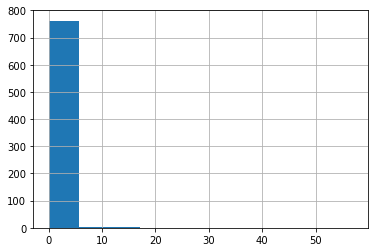

In [33]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count